<a href="https://colab.research.google.com/github/lucasmoore2k/Back-End-Projects/blob/master/Aula2_FilmesExplora%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploração de dados : Filmes

---



->Analisar conjuntos de dados do site MovieLens




In [0]:
import pandas as pd

->Após a importação do PANDAS, eu abro os arquivos através da função abaixo

In [0]:
pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


-> Dar um nome a função para facilitar as alterações

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")

In [0]:
filmes.columns = ["filmeId","titulo","genero"] #traduzindo o data frame

In [0]:
filmes.head() ##Mostra os 5(default) primeiros valores

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
##Ler as notas do arquivo

In [0]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
##Descobrir o formato do arquivo(número de colunas,linhas etc)=>
avaliacoes.shape

(100836, 4)

In [0]:
##Só avaliar número de linhas
len(avaliacoes)

100836

In [0]:
##Passo : Alterar os nomes das colunas para português

In [0]:
avaliacoes.columns = ["usuarioId","filmeId","nota","momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
##Fazer query(busca) nas avaliações
avaliacoes.query("filmeId==1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [0]:
##Analise de dados : Qual a média das notas? Qual as notas máxima e minimas?

In [0]:
avaliacoes.describe() ##Descreve a visão geral dos dados

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [0]:
##Pegar somente uma coluna para analise
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

Mostrar notas e filmes



In [0]:
##Agrupar as avalialções por filme
avaliacoes.groupby("filmeId")["nota"].mean() #Mostrar o id do filme por nota

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [0]:
##Leitura =>:No filme 1 a média é 3,9; No filme 2 a média é...

In [0]:
notasmed_filmes = avaliacoes.groupby("filmeId")["nota"].mean()
notasmed_filmes.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [0]:
##OBSERVAÇÃO: Lembrando que estou querendo unir duas tabelas:
##A tabela de NOTAS(series) e a tabela de FILMES(dataframe)

In [0]:
##Fazendo o join entre as duas tabelas
##nomedf.join(nomeds,on="tabela-em-comum")
filmes.join(notasmed_filmes, on="filmeId")
filmes_cmedia = filmes.join(notasmed_filmes, on="filmeId")
filmes_cmedia.head()

,filmeId,titulo,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
##Ordenar os filmes por nota descrescente
filmes_cmedia.sort_values("nota",ascending=False) 

,filmeId,titulo,genero,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


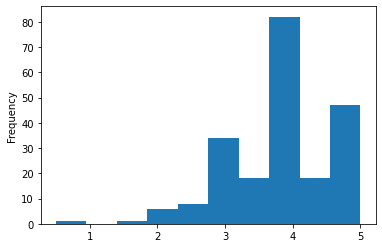

In [0]:
##Plotagem de gráfico
avaliacoes.query("filmeId == 1")["nota"].plot(kind = "hist")

DESAFIOS :

1- Encontre os filmes que nao tiveram avaliação

2 - Mudar no nome da coluna nota para média apos o JOIN

3-Colocar o numero de votantes por filme

4- Colocar coluna da nota média com duas casas decimais

5 - Descobrir os filmes por gênero

6 - Quantificar por gêneros

7- Plotar o gráfico de aparições por gênero tipo BARRA

**AULA 2**

---



---



In [0]:
##Separar os filmes por genero 
##Separar uma string

filmes["genero"].str.get_dummies('|')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
##Colocar os generos por números
filmes["genero"].str.get_dummies('|').sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [0]:
##Quantidade de generos num filme
filmes["genero"].str.get_dummies('|').sum(axis=1)  

0       5
1       3
2       2
3       3
4       1
       ..
9737    4
9738    3
9739    1
9740    2
9741    1
Length: 9742, dtype: int64

In [0]:
##Do maior para menor
filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False) 

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

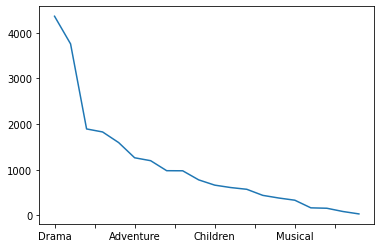

In [0]:
##Plotando gráfico
filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False).plot()

In [0]:
##OBSERVAÇÃO:Esse tipo de gráfico do ponto de vista da visualização não faz sentido,pois estamos
##analisando de acordo com as categorias e não a variação delas ao longo de uma determinada
#escala de tempo por exemplo.

##Logo o gráfico indicado é o gráfico de BARRA(bar não hist)
##O de pizza não é mais indicado mas pode fazer desde que destaque as porcentagens

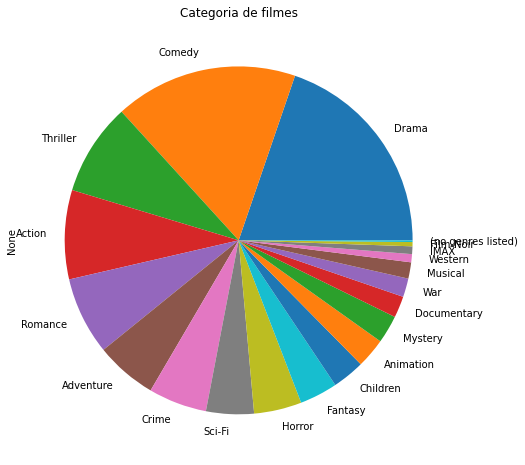

In [0]:
filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False).plot(kind='pie',
                                                                              title='Categoria de filmes',
                                                                              figsize=(8,8))

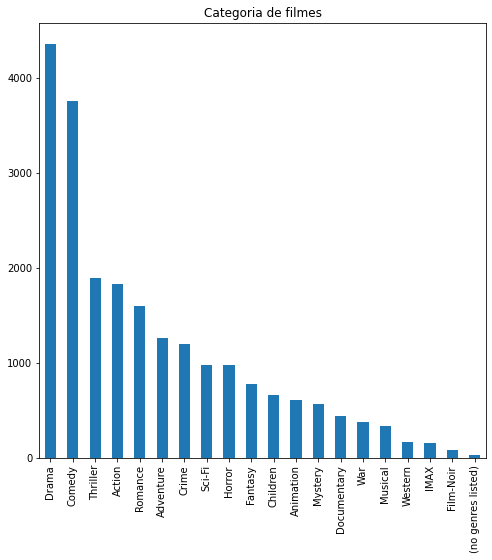

In [0]:
##Plotagem gráfico de barras
filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False).plot(kind='bar',title='Categoria de filmes',
                                                                              figsize=(8,8))

In [0]:
##Podemos melhorar mais esses dados através de uma mudança na paleta de cores

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


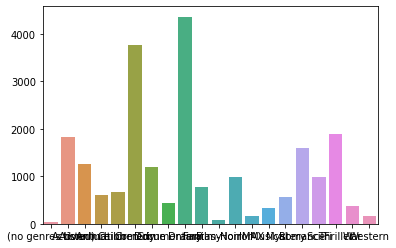

In [0]:
##Peguei os valores de X e Y e associei respectivamente a os valores do indice (GENERO) e os valores (nota)

filmes_pgenero = filmes["genero"].str.get_dummies('|').sum().sort_index()
sns.barplot(x=filmes_pgenero.index,
            y=filmes_pgenero.values)


In [0]:
import matplotlib.pyplot as plt

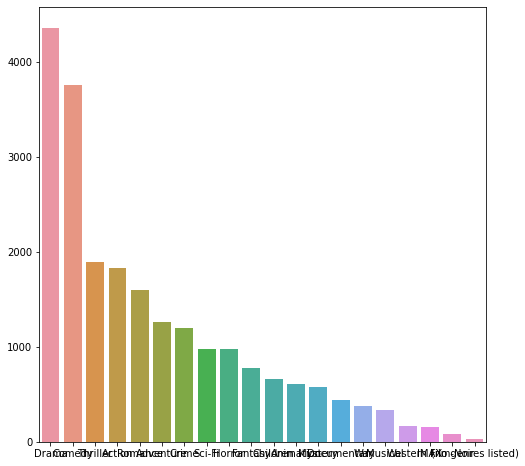

In [0]:
##Melhorando esse gráfico

filmes_pgenero = filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(x=filmes_pgenero.index,
            y=filmes_pgenero.values)
plt.show()

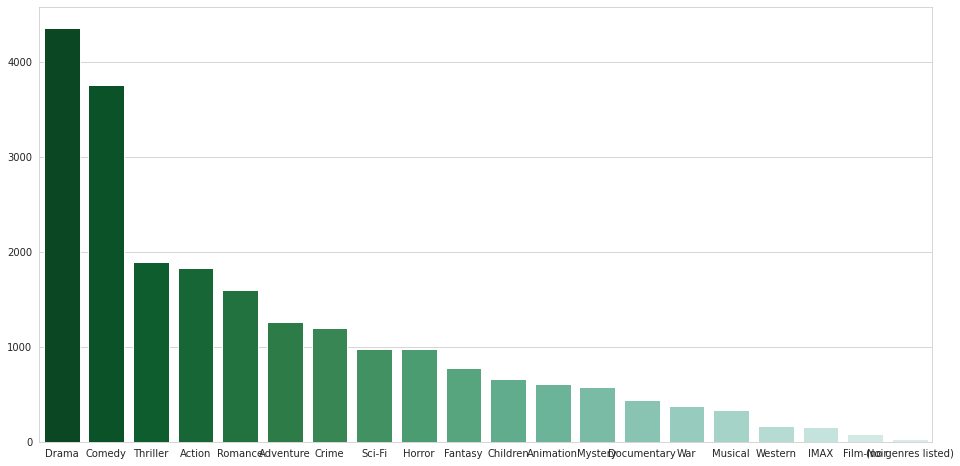

In [0]:
##Usando uma paleta de cores em formato decrescente
filmes_pgenero = filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
sns.barplot(x=filmes_pgenero.index,
            y=filmes_pgenero.values,
            palette=sns.color_palette("BuGn_r",n_colors=len(filmes_pgenero)+4))
plt.show()

In [0]:
def plot_filme(n):
   notas_filme = avaliacoes.query(f"filmeId == {n}")["nota"]
   notas_filme.plot(kind='hist')
   return notas_filme.describe()

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

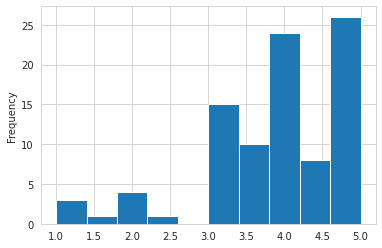

In [0]:
plot_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

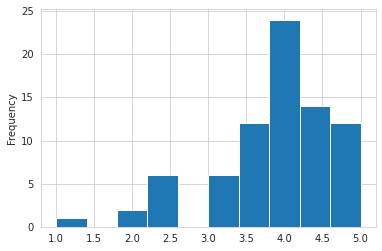

In [0]:
plot_filme(46578)

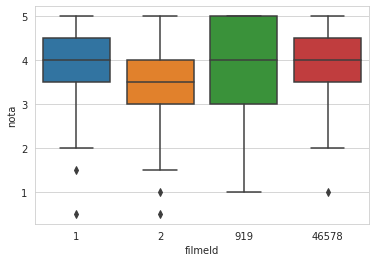

In [0]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x = "filmeId",y="nota")

Desafio 1 :  Rotacionar os thicks(nomes do genero)

Desafio 2 : Comparar gráficos de filmes diferentes

Desafio 3: Criar bloxpot dos filmes mais votados

Desafio 4: O boxplot esta num tamanho adequado e com os nomes nos thicks


outlawyer(ponto fora do curvo)


Desafio 5: Calcular moda,media e media dos filmes. Explore filmes com notas mais próximas de 0.5,3 e 5.

Desafio 6: Plotar boxplot e histograma um do lado do outro(na mesma figura/outras)

Desafio 7: Gráfico de notas médias por ano

